# LID task

In [1]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
country = 'TZ'
allowed_languages = ['en','sw','lg','rn','fr','so','ar','am','ti','rw']
whitelist = ['eng', 'swh', 'lug', 'run', 'fra', 'som', 'arb', 'amh', 'tir', 'kin']

In [4]:
df = pd.read_csv('/content/drive/MyDrive/MIT/MIT 807 mini-dissertation/Data/{}_tweets_with_LID.csv'.format(country))

In [5]:
df.head(3)

,key,Datetime,Tweet Id,Text,Username,Location,predict_name_afrolid,predict_name_cld3,predict_name_franc
0,daladala,2023-02-08 07:49:38,1623227542218985473,Dar Es Salaam watu wana hasira sana ukimgusa ...,fadhilikangusi,"Dar Es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili
1,daladala,2023-01-31 13:00:19,1620406624908345344,Muonekano wa Kituo Kipya cha Daladala cha Kiny...,raphyrodrick,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili
2,daladala,2023-01-27 06:19:14,1618856135645356034,Lakini kumpisha mtu mzima kwenye seat ya dalad...,DejohB,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili


# LID with CLD3 and Franc

In [6]:
!pip install pycld3
!pip install pyfranc
!pip install pycountry
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 25.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.9/262.9 KB 8.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 56.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=5e09c7a567bfaf9f8512ef83fcde9d3cef49a0cfc356f86367ff3122c4e3d1a3
  Stored in directory: /root/.cache/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry
Looking in indexes: https

In [7]:
import cld3
from pyfranc import franc

In [8]:
# Conduct token level LID

def tokenize_text(text):
  tokens = text.split()
  return tokens

# def get_token_lid_afrolid(tokens):
#   token_lid = []
#   for token in tokens:
#     predictions = cl.classify(token, max_outputs=1)
#     for lang in predictions:
#       if lang in whitelist:
#         token_lid.append(lang)
#   return token_lid

def get_token_lid_cld3(tokens):
  token_lid = []
  for token in tokens:
    predictions = cld3.get_language(token)
    for lang in predictions:
      language_code = predictions.language
      if language_code in allowed_languages:
        token_lid.append(language_code)
  return token_lid

def get_franc_prediction(text):
  predictions = franc.lang_detect(text, whitelist = whitelist)
  for lang in predictions:
    return predictions[0][0]

In [9]:
def get_majority_lid(lid_list):
    majority_lang = max(lid_list)

In [10]:
df['cld3_tokenlid'] = df['Text'].apply(lambda x: get_token_lid_cld3(tokenize_text(x)))
df['franc_tokenlid'] = df['Text'].apply(lambda x: get_franc_prediction(x))

In [11]:
df

,key,Datetime,Tweet Id,Text,Username,Location,predict_name_afrolid,predict_name_cld3,predict_name_franc,cld3_tokenlid,franc_tokenlid
0,daladala,2023-02-08 07:49:38,1623227542218985473,Dar Es Salaam watu wana hasira sana ukimgusa ...,fadhilikangusi,"Dar Es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw]",swh
1,daladala,2023-01-31 13:00:19,1620406624908345344,Muonekano wa Kituo Kipya cha Daladala cha Kiny...,raphyrodrick,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, en, en, en, en, sw, sw, sw, s...",swh
2,daladala,2023-01-27 06:19:14,1618856135645356034,Lakini kumpisha mtu mzima kwenye seat ya dalad...,DejohB,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh
3,daladala,2022-09-24 18:21:32,1573739424382423043,Kuna huyu mtu ana hadithia hapa eti anamwaka m...,AsiahSalum,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh
4,daladala,2022-09-19 09:35:17,1571795051818192898,Hongera sana SuluhuSamia kwa Kupata Siti nzuri...,ExMayorUbungo,Dar es salaam,Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh
...,...,...,...,...,...,...,...,...,...,...,...
993,bajaj,2019-03-01 04:42:02,1101341804618690560,Tanzania Trade Fair 2019 participation of Baj...,beenakoshy,NaN,Swahili,unrecognised,French,"[fr, fr, fr, fr, en, en, en, en, en, en, en, en]",fra
994,bajaj,2019-03-01 04:37:31,1101340668473929728,Bajaj Electricals at the Tanzania trade fair 2...,beenakoshy,NaN,Swahili,English,French,"[en, en, en, en, en, en, en, en, en, en, en, e...",fra
995,bajaj,2018-12-21 07:38:29,1076019057890074624,In Dar Es Salaam The Business and Busiest Cit...,mtaliitravels,"Dar es Salaam, Tanzania",Swahili,English,English,"[en, en, en, en, en, en, en, en, en, en, en, e...",eng
996,bajaj,2018-07-18 14:49:14,1019594953532600320,Safari bora 🚗 huanza unapoendeshwa kwa Bajaj u...,MondoRide255,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh


In [12]:
max(df['cld3_tokenlid'][0])

'sw'

In [13]:
get_majority_lid(df['cld3_tokenlid'][0])

In [14]:
df['cld3_tokenlid_iso'] = df['cld3_tokenlid'].apply(lambda x: max(x) if x else None)
df.head(2)




,key,Datetime,Tweet Id,Text,Username,Location,predict_name_afrolid,predict_name_cld3,predict_name_franc,cld3_tokenlid,franc_tokenlid,cld3_tokenlid_iso
0,daladala,2023-02-08 07:49:38,1623227542218985473,Dar Es Salaam watu wana hasira sana ukimgusa ...,fadhilikangusi,"Dar Es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw]",swh,sw
1,daladala,2023-01-31 13:00:19,1620406624908345344,Muonekano wa Kituo Kipya cha Daladala cha Kiny...,raphyrodrick,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, en, en, en, en, sw, sw, sw, s...",swh,sw


In [15]:
# decode the ISO codes to language names for cld3

import pycountry

def get_language_name_cld3(code):
  try:
    lang = pycountry.languages.get(alpha_2=code)
    return lang.name
  except:
    return 'unrecognised'

# decode the ISO codes to language names for afrolid and franc

iso_langs_EA = {
    'eng': 'English',
    'swh': 'Swahili',
    'lug': 'Ganda',
    'run': 'Kirundi',
    'fra': 'French',
    'som': 'Somali',
    'arb': 'Arabic',
    'amh': 'Amharic',
    'tir': 'Tigrinya',
    'kin': 'Kinyarwanda'
}

def map_language(iso_code):
  return iso_langs_EA.get(iso_code, 'unrecognised')

# df['predict_name_afrolid'] = df['afrolid_tokenlid'].apply(map_language)
df['predict_name_cld3'] = df['cld3_tokenlid_iso'].apply(get_language_name_cld3)
df['predict_name_franc'] = df['franc_tokenlid'].apply(map_language)

In [16]:
df.head(3)

,key,Datetime,Tweet Id,Text,Username,Location,predict_name_afrolid,predict_name_cld3,predict_name_franc,cld3_tokenlid,franc_tokenlid,cld3_tokenlid_iso
0,daladala,2023-02-08 07:49:38,1623227542218985473,Dar Es Salaam watu wana hasira sana ukimgusa ...,fadhilikangusi,"Dar Es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw]",swh,sw
1,daladala,2023-01-31 13:00:19,1620406624908345344,Muonekano wa Kituo Kipya cha Daladala cha Kiny...,raphyrodrick,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, en, en, en, en, sw, sw, sw, s...",swh,sw
2,daladala,2023-01-27 06:19:14,1618856135645356034,Lakini kumpisha mtu mzima kwenye seat ya dalad...,DejohB,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh,sw


In [17]:
from collections import Counter

def get_majority_lid(row):
    languages = [row['predict_name_afrolid'], row['predict_name_cld3'], row['predict_name_franc']]
    c = Counter(languages)
    majority_count = c.most_common()[0][1]
    if majority_count > 1:
        return c.most_common()[0][0]
    else:
        return 'undecided'

In [18]:
df['final_language'] = df.apply(get_majority_lid, axis=1)
df.head(3)

,key,Datetime,Tweet Id,Text,Username,Location,predict_name_afrolid,predict_name_cld3,predict_name_franc,cld3_tokenlid,franc_tokenlid,cld3_tokenlid_iso,final_language
0,daladala,2023-02-08 07:49:38,1623227542218985473,Dar Es Salaam watu wana hasira sana ukimgusa ...,fadhilikangusi,"Dar Es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw]",swh,sw,Swahili
1,daladala,2023-01-31 13:00:19,1620406624908345344,Muonekano wa Kituo Kipya cha Daladala cha Kiny...,raphyrodrick,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, en, en, en, en, sw, sw, sw, s...",swh,sw,Swahili
2,daladala,2023-01-27 06:19:14,1618856135645356034,Lakini kumpisha mtu mzima kwenye seat ya dalad...,DejohB,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh,sw,Swahili


<Axes: >

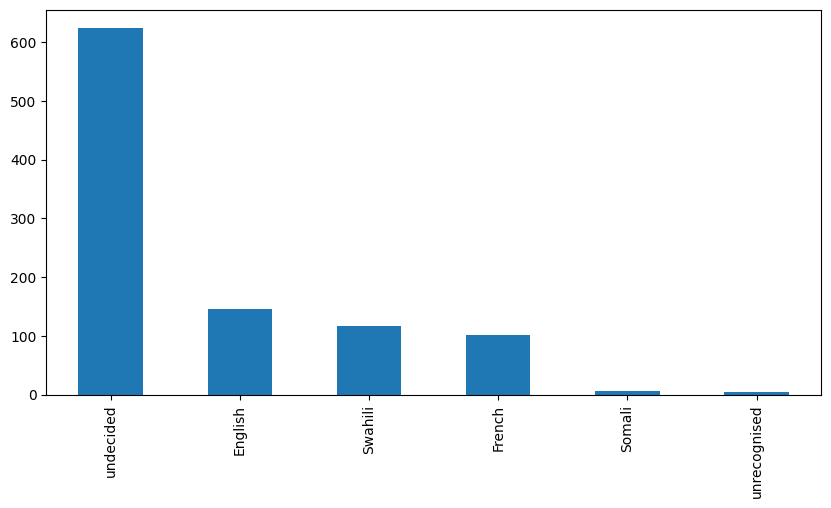

In [19]:
# find the language distribution of the final labels
df['final_language'].value_counts().plot.bar(figsize=(10,5), fontsize=10)

In [20]:
# find the username distribution 
df['Username'].value_counts()

BusWorldTZ        818
TzPhones           14
BusesDaily         13
gadgetboxtz         8
DALALIMWANAMKE      8
                 ... 
EngNyahucho         1
ITDPmx              1
brunokinyaga1       1
ummymwalimu         1
Sajjo               1
Name: Username, Length: 113, dtype: int64

In [21]:
# exclude tweets from the username BusWorldTZ

df = df[df['Username'] != 'BusWorldTZ']

In [22]:
len(df)

180

In [23]:
sample = df[df['final_language'] == 'undecided']

In [24]:
sample['Username'].value_counts()

BusesDaily         13
TzPhones           10
gadgetboxtz         7
Architect_Russ      4
owdenstz            3
ProfDoBad           3
KabanovRais         2
amo_iphone_         2
Grosvenor_MB        1
SamakiOnline        1
PetroKayanda8       1
dsarmanis           1
dailynewstz         1
tigerthedj          1
pvesterbacka        1
ypmjno1             1
becky_dale          1
beenakoshy          1
malimbika           1
kasiryesam10        1
ankali_mambi        1
miwasho0816         1
SouthernBuses       1
leepyne             1
TJMgidi             1
flyoverboi          1
humphreynyange      1
AyoubChakah         1
Anathi_Tshabe       1
Nichekitanzania     1
robertsylivesta     1
YudaSulePascha1     1
BusHighland         1
ITDPmx              1
Nkololotz           1
PlacidoMhaya        1
itsnkoba            1
mtaliitravels       1
Name: Username, dtype: int64

In [25]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [26]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub(r'\'s+', ' ', text)
    text = text.strip(' ') # removes all leading and trailing spaces in the text
    return text

In [27]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer

token = ToktokTokenizer()
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def lemitizeWords(text):
    words = token.tokenize(text)
    listLemma = []
    for w in words:
        x = lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):

    stop_words = set(stopwords.words("english"))

    words = token.tokenize(text)

    filtered = [w for w in words if not w in stop_words]

    return ' '.join(map(str, filtered))

In [28]:
import spacy

nlp = spacy.load('en_core_web_sm')

# define function to remove emojis
def remove_emojis(text):
    # define regex pattern to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"  # other emoticons
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    # remove emojis using regex pattern
    return emoji_pattern.sub(r'', text)


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [29]:
# define function to remove named entities
def remove_entities(text):
    """
    Remove country, city names, or companies from text using spaCy.

    Args:
        text (str): Text to remove entities from.

    Returns:
        str: Text with entities removed.
    """
    doc = nlp(text)
    new_text = []
    for token in doc:
        if not (token.ent_type_ == "GPE" or token.ent_type_ == "LOC" or token.ent_type_ == "ORG"):
            new_text.append(token.text)
    return " ".join(new_text)

In [30]:
def remove_keywords(text):
    keywords = ['dar es salaam', 'iphone', 'tanzania', 'dar', 'es', 'salaam']
    for keyword in keywords:
        text = text.replace(keyword, '')
    return text

In [31]:
# Download the Swahili stop words CSV file from Kaggle
def remove_swahili_stopwords(text):
  # Open stop words file and split into a list
  with open('/content/drive/MyDrive/MIT/MIT 807 mini-dissertation/Data/swahili_stopwords.txt', 'r') as f:
    stop_words = f.read().split('\n')

  # Remove stop words from text
  words = text.split()
  filtered_words = [word for word in words if word.lower() not in stop_words]
  filtered_text = ' '.join(filtered_words)
  return filtered_text

In [32]:
def combine(new_df):  
  new_df['Text'] = new_df['Text'].apply(lambda x: clean_text(x))
  print(1)
  new_df['Text'] = new_df['Text'].apply(lambda x: lemitizeWords(x))
  print(2)
  new_df['Text'] = new_df['Text'].apply(lambda x: stopWordsRemove(x))
  print(3)
  new_df['Text'] = new_df['Text'].apply(lambda x: remove_emojis(x))
  print(4)
  new_df['Text'] = new_df['Text'].apply(lambda x: remove_entities(x))
  print(5)
  new_df['Text'] = new_df['Text'].apply(lambda x: remove_keywords(x))
  print(6)
  new_df['Text'] = new_df['Text'].apply(lambda x: remove_swahili_stopwords(x))
  return new_df

In [33]:
df_new = combine(df)
df_new

<ipython-input-32-df3739378e6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(lambda x: clean_text(x))


1


<ipython-input-32-df3739378e6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(lambda x: lemitizeWords(x))
<ipython-input-32-df3739378e6e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(lambda x: stopWordsRemove(x))
<ipython-input-32-df3739378e6e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

2
3
4


<ipython-input-32-df3739378e6e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(lambda x: remove_entities(x))
<ipython-input-32-df3739378e6e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(lambda x: remove_keywords(x))


5
6


<ipython-input-32-df3739378e6e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(lambda x: remove_swahili_stopwords(x))


,key,Datetime,Tweet Id,Text,Username,Location,predict_name_afrolid,predict_name_cld3,predict_name_franc,cld3_tokenlid,franc_tokenlid,cld3_tokenlid_iso,final_language
0,daladala,2023-02-08 07:49:38,1623227542218985473,wana hasira ukimgusa kidogo daladala anakupa b...,fadhilikangusi,"Dar Es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw]",swh,sw,Swahili
1,daladala,2023-01-31 13:00:19,1620406624908345344,muonekano kituo kipya daladala kinyerezi barab...,raphyrodrick,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, en, en, en, en, sw, sw, sw, s...",swh,sw,Swahili
2,daladala,2023-01-27 06:19:14,1618856135645356034,kumpisha mtu mzima seat daladala sio part maad...,DejohB,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh,sw,Swahili
3,daladala,2022-09-24 18:21:32,1573739424382423043,kuna huyu mtu ana hadithia hapa eti anamwaka m...,AsiahSalum,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh,sw,Swahili
4,daladala,2022-09-19 09:35:17,1571795051818192898,hongera suluhusamia kupata siti nzuri dirishan...,ExMayorUbungo,Dar es salaam,Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh,sw,Swahili
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,bajaj,2019-03-01 04:42:02,1101341804618690560,trade fair 2019 participation bajaj electrical...,beenakoshy,NaN,Swahili,French,French,"[fr, fr, fr, fr, en, en, en, en, en, en, en, en]",fra,fr,French
994,bajaj,2019-03-01 04:37:31,1101340668473929728,trade fair 2019 visit indian high commission h...,beenakoshy,NaN,Swahili,English,French,"[en, en, en, en, en, en, en, en, en, en, en, e...",fra,en,undecided
995,bajaj,2018-12-21 07:38:29,1076019057890074624,busins busit city locals use tri motorycycl ba...,mtaliitravels,"Dar es Salaam, Tanzania",Swahili,Somali,English,"[en, en, en, en, en, en, en, en, en, en, en, e...",eng,so,undecided
996,bajaj,2018-07-18 14:49:14,1019594953532600320,safari bora huanza unapoendhwa bajaj ukiwa mad...,MondoRide255,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh,sw,Swahili


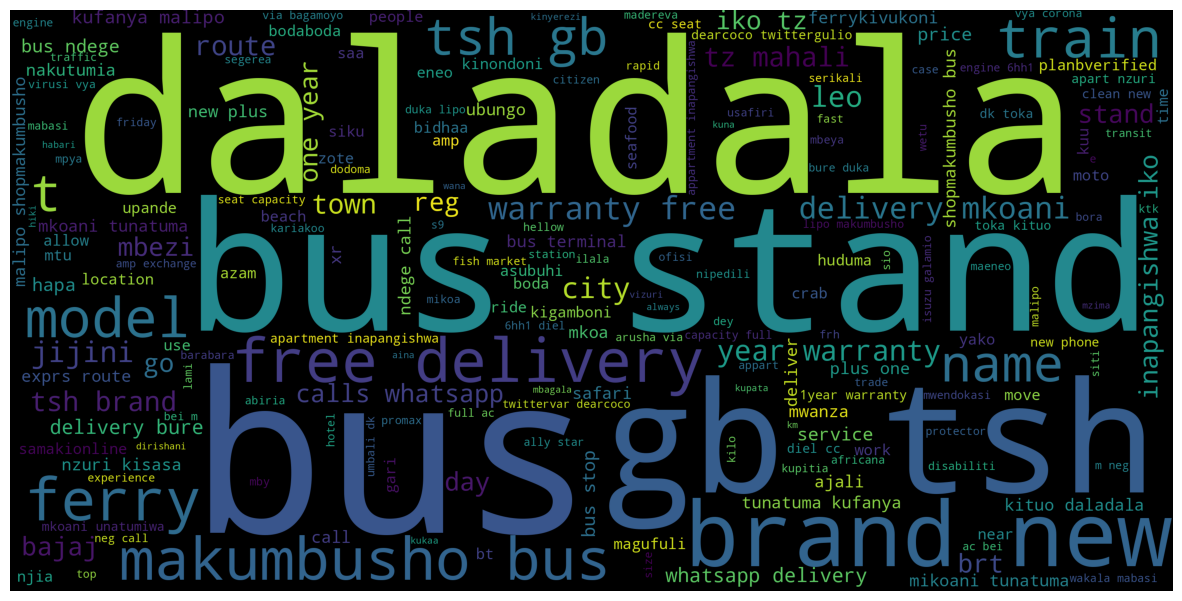

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=3000, height=1500).generate(text)
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(" ".join(df_new['Text']))

# Sentiment Analysis

## Monolingual

In [87]:
# get training data

train = pd.read_csv('/content/drive/MyDrive/MIT/MIT 807 mini-dissertation/Data/Training data/Swahili/train.csv')
test = pd.read_csv('/content/drive/MyDrive/MIT/MIT 807 mini-dissertation/Data/Training data/Swahili/test.csv')
dev = pd.read_csv('/content/drive/MyDrive/MIT/MIT 807 mini-dissertation/Data/Training data/Swahili/dev.csv')

df = pd.concat([train, test, dev], axis=0)

df


,tweet,label
0,Kwani tanesco wanakataga umeme makusudinadhani...,negative
1,cjawahi kuona content yoyote zaidi ya kuwa ana...,negative
2,Bomu lililokuwa limetegwa ndani ya gari likiwa...,negative
3,Kuna video inasambaa mitandaoni jamaa amemfuma...,negative
4,Viwavijeshi wanapita katika hatua kuu 6 za uku...,negative
...,...,...
448,Usiingie kwenye mahusiano na mtu ambae hutatam...,positive
449,Wapambanaji wa kuleta makombe Msimbazi,neutral
450,Elimu Ni Ufunguo Wa Maisha Sasa huyu mwanafunz...,neutral
451,Viingilio vya tamasha kubwa zaidi nchini Unawe...,neutral


In [88]:
df['labels'] = pd.Categorical(df['label']).codes

In [89]:
df.head()

,tweet,label,labels
0,Kwani tanesco wanakataga umeme makusudinadhani...,negative,0
1,cjawahi kuona content yoyote zaidi ya kuwa ana...,negative,0
2,Bomu lililokuwa limetegwa ndani ya gari likiwa...,negative,0
3,Kuna video inasambaa mitandaoni jamaa amemfuma...,negative,0
4,Viwavijeshi wanapita katika hatua kuu 6 za uku...,negative,0


In [90]:
labels = list(pd.Categorical(df['label']).categories)

In [99]:
pd.Categorical(df['label']).categories

Index(['negative', 'neutral', 'positive'], dtype='object')

In [91]:
labels_index = {label: i for i, label in enumerate(labels)}
labels_index

{'negative': 0, 'neutral': 1, 'positive': 2}

In [92]:
index_labels = {str(i): label for i, label in enumerate(labels)}
index_labels

{'0': 'negative', '1': 'neutral', '2': 'positive'}

In [93]:
df['label'].value_counts()

neutral     1784
positive     908
negative     319
Name: label, dtype: int64

In [94]:
data_labels = df.groupby('label')['label'].count().sort_values(ascending=False).reset_index(name='count')

In [95]:
data_labels

,label,count
0,neutral,1784
1,positive,908
2,negative,319


In [96]:
df.head()

,tweet,label,labels
0,Kwani tanesco wanakataga umeme makusudinadhani...,negative,0
1,cjawahi kuona content yoyote zaidi ya kuwa ana...,negative,0
2,Bomu lililokuwa limetegwa ndani ya gari likiwa...,negative,0
3,Kuna video inasambaa mitandaoni jamaa amemfuma...,negative,0
4,Viwavijeshi wanapita katika hatua kuu 6 za uku...,negative,0


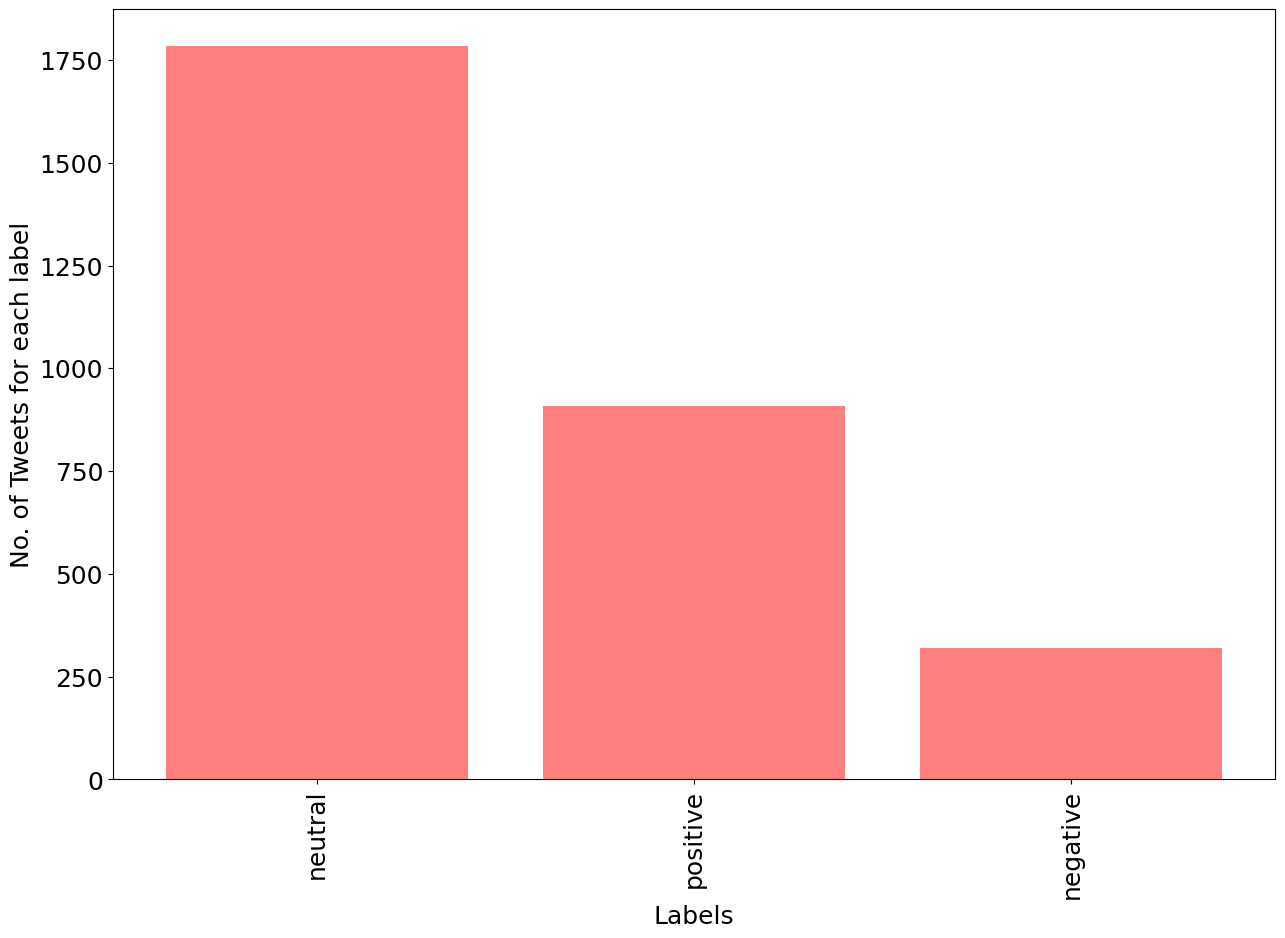

In [97]:
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(data_labels['label'], data_labels['count'], align = 'center', alpha= 0.5, color ='red')
plt.rcParams['font.size'] = 18
plt.xticks(rotation='vertical') 
plt.xlabel("Labels")
plt.ylabel("No. of Tweets for each label")
plt.savefig('Sentiment distribution.png')
plt.show()

# Tokenization

In [ ]:
!pip install transformers
!pip install datasets

In [ ]:
import zipfile
import torch

import pandas as pd
import numpy as np
import seaborn as sns

from typing import Dict
from torch.utils.data import Dataset, DataLoader
from datasets import Dataset 
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import  precision_recall_fscore_support, accuracy_score, confusion_matrix, classification_report, accuracy_score

from transformers import EvalPrediction
from transformers import Trainer, TrainingArguments, PreTrainedTokenizer
from transformers import AutoConfig, AutoModelForSequenceClassification
from transformers import AutoTokenizer, XLMRobertaTokenizer, AutoModelForTokenClassification
from transformers import DataCollatorWithPadding, TextClassificationPipeline

In [ ]:
#Loading the model specific tokenizer 
tokenizer = AutoTokenizer.from_pretrained("castorini/afriberta_large")
tokenizer.model_max_length = 512

In [ ]:
x_tweets = df[['tweet', 'label','labels']]

In [ ]:
# # Normal Data Split 
train_texts, validation_texts = train_test_split(x_tweets, test_size=.2)

test_texts, val_texts = train_test_split(validation_texts, test_size=.5)

In [ ]:
train_texts = train_texts.dropna()

In [ ]:
temp_train = Dataset.from_pandas(train_texts)

train_dataset = temp_train.map(lambda examples : tokenizer(examples["text"], max_length=512, add_special_tokens=True,truncation=True, padding='max_length'), batched=True)
train_dataset.set_format( columns=['input_ids', 'labels', 'attention_mask'])

In [ ]:
temp_test = Dataset.from_pandas(test_texts)

test_dataset = temp_test.map(lambda examples : tokenizer(examples["text"], max_length=512, add_special_tokens=True,truncation=True, padding='max_length'), batched=True)
test_dataset.set_format(type='torch', columns=['input_ids', 'labels', 'attention_mask'])

In [ ]:
temp_val = Dataset.from_pandas(val_texts)

eval_dataset = temp_val.map(lambda examples : tokenizer(examples["text"], max_length=512, add_special_tokens=True,truncation=True, padding='max_length'), batched=True)
eval_dataset.set_format(type='torch', columns=['input_ids', 'labels', 'attention_mask'])

# AfriBERTa Model

In [ ]:
modelType = "castorini/afriberta_large"

In [ ]:
num_labels = df["labels"].nunique()

In [ ]:
num_labels

In [ ]:
config = AutoConfig.from_pretrained(modelType, num_labels=num_labels, id2label =  index_labels , label2id= labels_index )

In [ ]:
def model_init():
  return AutoModelForSequenceClassification.from_pretrained(modelType, config=config)

In [ ]:
training_args = TrainingArguments(output_dir="./afriberta_results", 
                                  per_device_train_batch_size=16, 
                                  per_device_eval_batch_size=16, 
                                  num_train_epochs=2, 
                                  # report_to="wandb", 
                                  do_eval=True,
                                  do_predict=True,
                                  weight_decay =  0.028385075820435143,
                                  seed = 16978,
                                  learning_rate = 5e-5 ,
                                  adafactor = True,
                                  adam_beta1= 0.7640150802510443,
                                  adam_beta2= 0.743931677238676,
                                  adam_epsilon = 3e-8 ,
                                  max_grad_norm = 0.47726717061800594,
                                  evaluation_strategy='steps',
                                  logging_steps = 100 
                                  )

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='micro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
trainer = Trainer(
            model= None,
            args= training_args,
            train_dataset= train_dataset,
            eval_dataset= test_dataset,
            tokenizer= tokenizer,
            data_collator=data_collator,
            model_init = model_init,
            compute_metrics= compute_metrics
)

In [ ]:
# Now we train the Sequence classifier. be patient this may take a while
trainer.train()

In [ ]:
trainer.save_model('/content/drive/MyDrive/MIT/MIT 807 mini-dissertation/Afriberta_Classic_sentiment')

In [ ]:
trainer.evaluate()

In [ ]:
afriberta_model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/MIT/MIT 807 mini-dissertation/Afriberta_Classic_sentiment", local_files_only=True)

afriberta_trainer = Trainer(model=afriberta_model)
afriberta_trainer.model = afriberta_model.cuda()

In [ ]:
predictions, labels, metrics = afriberta_trainer.predict(eval_dataset)

In [ ]:
y_predictions =list(np.argmax(predictions, axis=1))

In [ ]:
y_true_labels = list(labels)

In [ ]:
# Confusion matrix 
def plot_confusion_matrix(cm, num_of_classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(num_of_classes))
    plt.xticks(tick_marks, num_of_classes, rotation=45)
    plt.yticks(tick_marks, num_of_classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true_labels, y_predictions)

In [ ]:
result_dir = '/content/drive/MyDrive/MIT/MIT 807 mini-dissertation//results_afriberta_classic_sentiment'

In [ ]:
import itertools

fig, ax = plt.subplots(figsize=(15, 12))
plot_confusion_matrix(cnf_matrix, num_of_classes=['negative', 'neutral', 'positive'], title='Confusion matrix, without normalization')
# plt.savefig(result_dir+'plot_confusion_matrix_2.png')

In [ ]:
label_names = ['negative', 'neutral', 'positive']
print(classification_report(y_true_labels, y_predictions))  #, target_names=label_names))

In [ ]:
from sklearn.preprocessing import label_binarize

binarized_y_true_labels = label_binarize(y_true_labels, classes=[0, 1, 2])
binarized_y_true_labels.shape

In [ ]:
# PLOT ROC
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
import keras

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_labels):
    fpr[i], tpr[i], _ = roc_curve(binarized_y_true_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(binarized_y_true_labels.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_labels)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_labels):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
# Finally average it and compute AUC
mean_tpr /= num_labels

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_labels), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for IMDb62 Dataset')
plt.legend(loc="lower right")
plt.show()

# Datasets Comparison

## N-gram length comparison

In [40]:
df_swahili = df_new[df_new['final_language'] == 'Swahili']
df_swahili.head(3)

,key,Datetime,Tweet Id,Text,Username,Location,predict_name_afrolid,predict_name_cld3,predict_name_franc,cld3_tokenlid,franc_tokenlid,cld3_tokenlid_iso,final_language
0,daladala,2023-02-08 07:49:38,1623227542218985473,wana hasira ukimgusa kidogo daladala anakupa b...,fadhilikangusi,"Dar Es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw]",swh,sw,Swahili
1,daladala,2023-01-31 13:00:19,1620406624908345344,muonekano kituo kipya daladala kinyerezi barab...,raphyrodrick,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, en, en, en, en, sw, sw, sw, s...",swh,sw,Swahili
2,daladala,2023-01-27 06:19:14,1618856135645356034,kumpisha mtu mzima seat daladala sio part maad...,DejohB,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh,sw,Swahili


In [41]:
# n-gram length comparison
df['tweet_length'] = df['tweet'].apply(len)
df_swahili['tweet_length'] = df_swahili['Text'].apply(len)


<ipython-input-41-0720c48371c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swahili['tweet_length'] = df_swahili['Text'].apply(len)


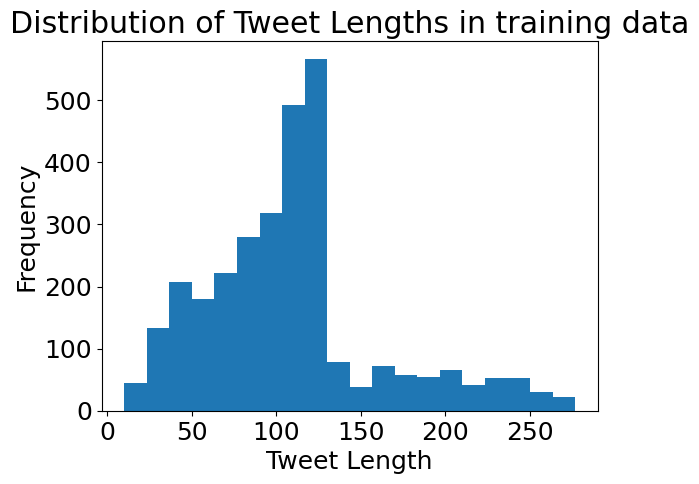

In [42]:
plt.hist(df['tweet_length'], bins=20)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths in training data')
plt.show()

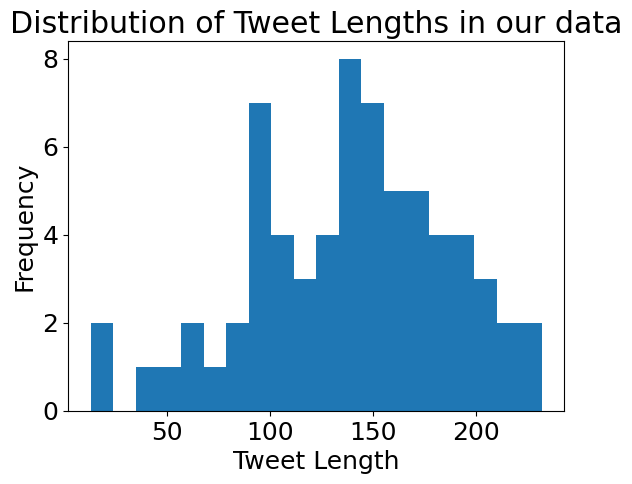

In [43]:
plt.hist(df_swahili['tweet_length'], bins=20)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths in our data')
plt.show()

## Similarity Scores between the two datasets

In [48]:
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


chunk_size = 67
df_chunks = [df[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

In [46]:
df_swahili['Text']

0      wana hasira ukimgusa kidogo daladala anakupa b...
1      muonekano kituo kipya daladala kinyerezi barab...
2      kumpisha mtu mzima seat daladala sio part maad...
3      kuna huyu mtu ana hadithia hapa eti anamwaka m...
4      hongera suluhusamia kupata siti nzuri dirishan...
                             ...                        
986    banae nimo mkoa mkuu mamake ranny sleep bagamo...
990    nasikia tuna safirisha 🤣 🤣 🤣 wizzypixel aka di...
992    bodaboda bajaj ruksa kuingia mjini mkoa makond...
996    safari bora huanza unapoendhwa bajaj ukiwa mad...
997    wamiliki magari bajaj bodaboda mikoa arusha mw...
Name: Text, Length: 67, dtype: object

In [49]:
# Measure similarity between each chunk of df_1 and df_2
df2 = df_swahili['Text']

similarity_scores = []
for chunk in df_chunks:
    # Combine tweets from chunk and df_2 into a single list
    combined_tweets = chunk['tweet'].tolist() + df2.tolist()
    
    # Convert tweets to TF-IDF vectors
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(combined_tweets)
    
    # Compute cosine similarity between df_2 and chunk
    similarity = cosine_similarity(vectors[len(chunk):], vectors[:len(chunk)])
    similarity_scores.append(np.mean(similarity))

# Compute overall similarity score by taking the maximum score across all chunks
overall_similarity = max(similarity_scores)

In [63]:
overall_similarity

0.003813664428471887

In [72]:
chunk

,Text
390,Mama Verdiana alisema maneno mazito sana kabla...
391,Uandishi ni rejea nzuri sana kwa kizazi cha le...
392,kufahamu kiasi na kufanya malipo kuondoa ujumb...
393,Kutokana na kuongezeka kwa kiwango cha udhibit...
394,Kwa mara ya kwanza Tanzania imefanya utafiti w...
...,...
452,Hakuna maji wangeishijekuziba watu midomo si s...
0,wana hasira ukimgusa kidogo daladala anakupa b...
1,muonekano kituo kipya daladala kinyerezi barab...
2,kumpisha mtu mzima seat daladala sio part maad...


In [73]:
jaccard = []

# Define the chunk size
chunk_size = 67

# Iterate over chunks of df
for i in range(0, len(df), chunk_size):
    # Get the current chunk
    chunk = df.iloc[i:i+chunk_size]

    # Subset df2 to match the size of the current chunk
    df_2_subset = df_swahili.sample(n=len(chunk), random_state=42)

    # Concatenate the two dataframes
    combined_df = pd.concat([chunk, df_2_subset])

    # Fit the vectorizer on the combined data
    vectorizer.fit(combined_df['Text'])

    # Transform the data into vectors
    vec1 = vectorizer.transform(chunk['Text'])
    vec1 = np.array(vec1.toarray()).flatten()

    vec2 = vectorizer.transform(df_2_subset['Text'])
    vec2 = np.array(vec2.toarray()).flatten()

    # Calculate the Jaccard similarity index
    jaccard.append(jaccard_score(vec1, vec2, average=None))


jaccard

[array([0.97666809, 0.00213561, 0.        , 0.        , 0.        ]),
 array([0.95700334, 0.02239533, 0.        , 0.        ])]

In [64]:
# Calculate the Euclidean distance between the two vectors
euclidean_distance = np.linalg.norm(vec1 - vec2)

print("Euclidean distance:", euclidean_distance)

Euclidean distance: 52.848841046895245
